#### feature importance
plusieurs modele

afficher les score
graphe montrant l'evolution des csores


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [43]:
df = pd.read_csv('data_final.csv')
df.head(10)

,AGE,pression_arterielle_repos,CHOLESTEROL,frequence_cardiaque_max,DEPRESSION,glycemie_a_jeun,type_douleur_thoracique_AA,type_douleur_thoracique_ASY,type_douleur_thoracique_AT,type_douleur_thoracique_DNA,electrocardiogramme_repos_LVH,electrocardiogramme_repos_Normal,electrocardiogramme_repos_ST,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat,CŒUR
0,0.461538,0.60,-0.074667,-0.777778,1.266667,0,0,1,0,0,0,1,0,0,0,1,1
1,0.076923,-0.50,-2.378667,-0.361111,1.266667,0,0,0,0,1,0,0,1,0,0,1,1
2,0.307692,-0.50,-2.378667,-0.888889,0.600000,0,0,1,0,0,1,0,0,0,1,0,1
3,0.076923,-0.75,-2.378667,0.472222,-0.333333,1,0,1,0,0,0,1,0,0,0,1,1
4,1.230769,2.00,-0.330667,-0.250000,1.600000,0,0,1,0,0,0,0,1,0,1,0,1
5,-0.615385,-0.75,-2.378667,-0.694444,0.600000,0,0,1,0,0,0,1,0,0,0,1,1
6,0.615385,1.50,-0.629333,0.194444,3.733333,0,0,1,0,0,1,0,0,0,1,0,1
7,0.615385,-0.50,0.330667,-1.250000,-0.400000,0,1,0,0,0,1,0,0,0,0,1,1
8,1.769231,-0.30,-0.554667,-0.777778,0.933333,0,0,1,0,0,0,0,1,1,0,0,1
9,1.230769,-0.75,-2.378667,-1.277778,-0.400000,0,0,1,0,0,0,0,1,0,0,1,1


In [44]:
#divisons notre data pour faire la modelisation

X = df.drop(['CŒUR'], axis=1)
y = df['CŒUR'] 

#60% pour le train, 20% pour la validation, et 20 % pour le test

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.4, random_state = 0)

X_val, X_test, y_val, y_test =  train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(364, 16)
(364,)
(122, 16)
(122,)
(122, 16)
(122,)


# Modelisation 

In [45]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_recall_curve, classification_report, confusion_matrix

In [46]:
#un premier modele de depart
random = RandomForestClassifier(random_state=0)
random.fit(X_train, y_train)

accuracy_score (y_val, random.predict(X_val))

0.8852459016393442

In [47]:
#selection des variables importantes importantes
print(X_train.columns)
print(random.feature_importances_)

Index(['AGE', 'pression_arterielle_repos', 'CHOLESTEROL',
       'frequence_cardiaque_max', 'DEPRESSION ', 'glycemie_a_jeun',
       'type_douleur_thoracique_AA', 'type_douleur_thoracique_ASY',
       'type_douleur_thoracique_AT', 'type_douleur_thoracique_DNA',
       'electrocardiogramme_repos_LVH', 'electrocardiogramme_repos_Normal',
       'electrocardiogramme_repos_ST', 'PENTE_Ascendant', 'PENTE_Descendant',
       'PENTE_Plat'],
      dtype='object')
[0.08746703 0.06145893 0.13339972 0.10662337 0.14684245 0.01668115
 0.03493926 0.10870048 0.01336336 0.01403039 0.0113156  0.01031396
 0.00944762 0.15134672 0.00663378 0.08743619]


In [48]:
variable_importante = pd.Series(random.feature_importances_ , index = X_train.columns).sort_values(ascending = False)
variable_importante

PENTE_Ascendant                     0.151347
DEPRESSION                          0.146842
CHOLESTEROL                         0.133400
type_douleur_thoracique_ASY         0.108700
frequence_cardiaque_max             0.106623
AGE                                 0.087467
PENTE_Plat                          0.087436
pression_arterielle_repos           0.061459
type_douleur_thoracique_AA          0.034939
glycemie_a_jeun                     0.016681
type_douleur_thoracique_DNA         0.014030
type_douleur_thoracique_AT          0.013363
electrocardiogramme_repos_LVH       0.011316
electrocardiogramme_repos_Normal    0.010314
electrocardiogramme_repos_ST        0.009448
PENTE_Descendant                    0.006634
dtype: float64

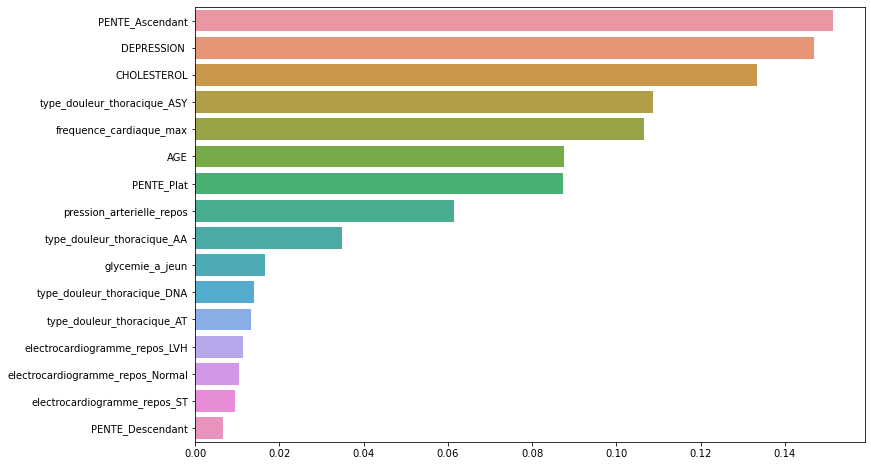

In [49]:
plt.figure(figsize=(12, 8))
sn.barplot(x = variable_importante, y = variable_importante.index);

In [50]:
def evalue_feature(feature_list):
    print('FORMATION AVEC '+str(len(feature_list)) +' VARIABLE'+ ' ', feature_list )
    random = RandomForestClassifier(random_state=0)
    random.fit(X_train[feature_list], y_train)
    y_pred = random.predict(X_test[feature_list])
    print(classification_report(y_test, y_pred))
    print(" "*50)
    print("-----"*50)
    print(" "*50)

In [51]:
for i in range(len(variable_importante.index)):
    evalue_feature(variable_importante.sort_values(ascending=False).index[0: i+1])

FORMATION AVEC 1 VARIABLE  Index(['PENTE_Ascendant'], dtype='object')
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        61
           1       0.74      0.84      0.78        61

    accuracy                           0.77       122
   macro avg       0.78      0.77      0.77       122
weighted avg       0.78      0.77      0.77       122

                                                  
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                  
FORMATION AVEC 2 VARIABLE  Index(['PENTE_Ascendant', 'DEPRESSION '], dtype='object')
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        61
           1       0.81      0.85      0.83        61

 

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        61
           1       0.87      0.90      0.89        61

    accuracy                           0.89       122
   macro avg       0.89      0.89      0.89       122
weighted avg       0.89      0.89      0.89       122

                                                  
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                  
FORMATION AVEC 12 VARIABLE  Index(['PENTE_Ascendant', 'DEPRESSION ', 'CHOLESTEROL',
       'type_douleur_thoracique_ASY', 'frequence_cardiaque_max', 'AGE',
       'PENTE_Plat', 'pression_arterielle_repos', 'type_douleur_thoracique_AA',
       'glycemie_a_jeun', 'type_douleur_thoracique_DNA',
       'type_douleur_thorac

In [52]:
#variable qui ne nous servirons plus
variable_n_imp = ['PENTE_Plat', 'pression_arterielle_repos', 'type_douleur_thoracique_AA',
       'glycemie_a_jeun', 'type_douleur_thoracique_DNA',
       'type_douleur_thoracique_AT', 'electrocardiogramme_repos_LVH',
       'electrocardiogramme_repos_Normal', 'electrocardiogramme_repos_ST',
       'PENTE_Descendant']

In [53]:
X_train = X_train.drop(variable_n_imp, axis = 1)
X_val = X_val.drop(variable_n_imp, axis = 1)
X_test = X_test.drop(variable_n_imp, axis = 1)

In [54]:
#plusieurs modelisations

model1 = GaussianNB()
model3 = KNeighborsClassifier()
model4 = LogisticRegression(random_state = 0)
model5 = SVC(random_state = 0)
model6 = BaggingClassifier(n_estimators=100)
model7 = RandomForestClassifier(random_state = 0)


for model in (model1, model3, model4, model5, model6, model7):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_val, y_val))

GaussianNB 0.8360655737704918
KNeighborsClassifier 0.8032786885245902
LogisticRegression 0.8360655737704918
SVC 0.8770491803278688
BaggingClassifier 0.8442622950819673
RandomForestClassifier 0.8524590163934426


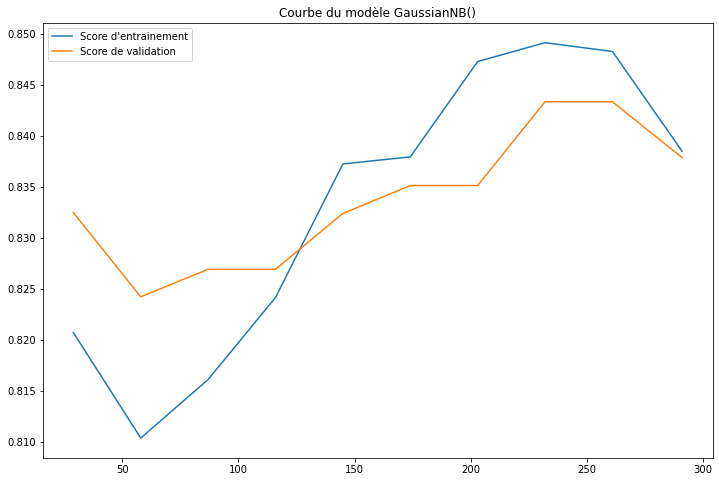

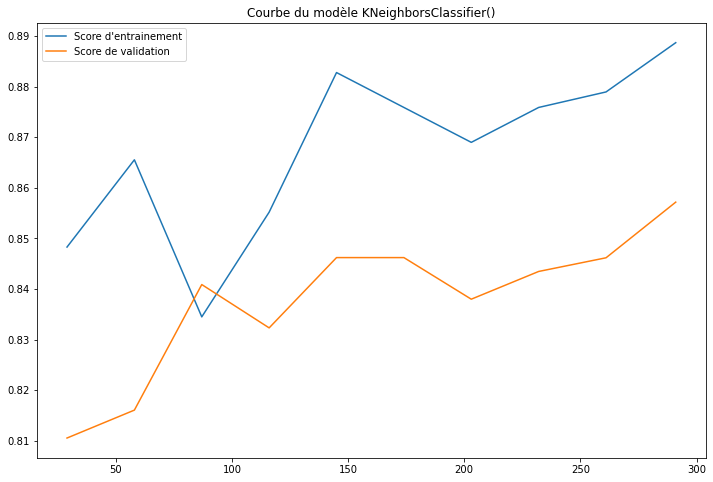

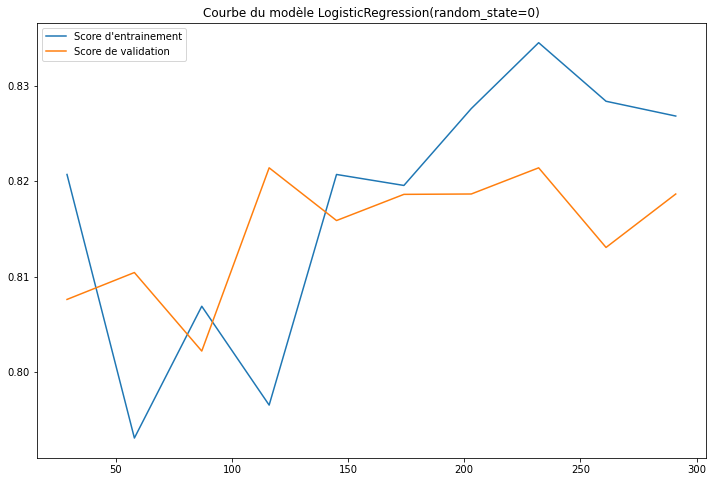

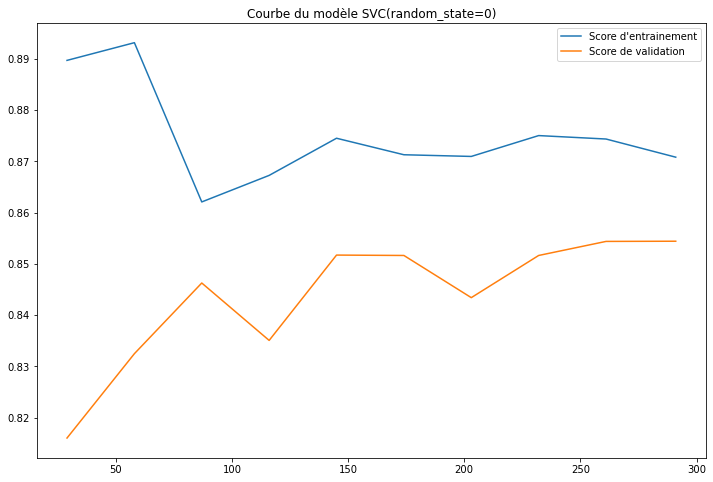

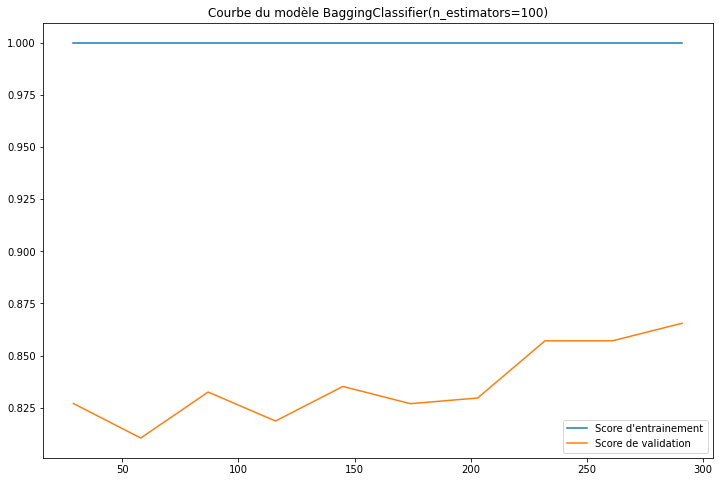

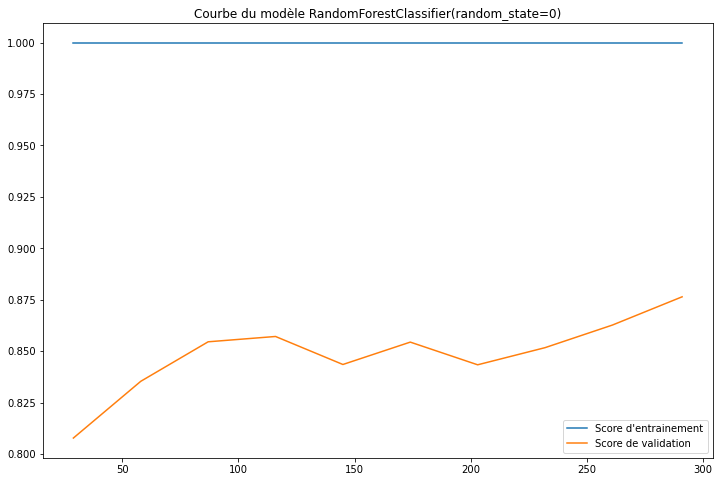

In [58]:
#visualisation 
for model in models:
    N, train_score, val_score = learning_curve(model, X_train, y_train,cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1., 10))

    plt.figure(figsize=(12, 8))
    plt.title(f"Courbe du modèle {model}")
    plt.plot(N, train_score.mean(axis=1), label = "Score d'entrainement")
    plt.plot(N, val_score.mean(axis=1), label = 'Score de validation')
    plt.legend();

In [56]:
#Evaluation les performances des modeles
def evalue (model, features, labels):
    pred = model.predict(features)
    score = accuracy_score(y_val, pred)
    print('Score global du modèle :', round(score, 3))

In [57]:
models  = (model1, model3, model4, model5, model6, model7)
for model in models :
    print('Modèle ' + str(model))
    evalue(model, X_val, y_val)
    print('-'*90)

Modèle GaussianNB()
Score global du modèle : 0.836
------------------------------------------------------------------------------------------
Modèle KNeighborsClassifier()
Score global du modèle : 0.803
------------------------------------------------------------------------------------------
Modèle LogisticRegression(random_state=0)
Score global du modèle : 0.836
------------------------------------------------------------------------------------------
Modèle SVC(random_state=0)
Score global du modèle : 0.877
------------------------------------------------------------------------------------------
Modèle BaggingClassifier(n_estimators=100)
Score global du modèle : 0.844
------------------------------------------------------------------------------------------
Modèle RandomForestClassifier(random_state=0)
Score global du modèle : 0.852
------------------------------------------------------------------------------------------


In [59]:
#choix du modele
model = model5
y_pred = model.predict(X_test)
y_pred 

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        61
           1       0.82      0.87      0.84        61

    accuracy                           0.84       122
   macro avg       0.84      0.84      0.84       122
weighted avg       0.84      0.84      0.84       122



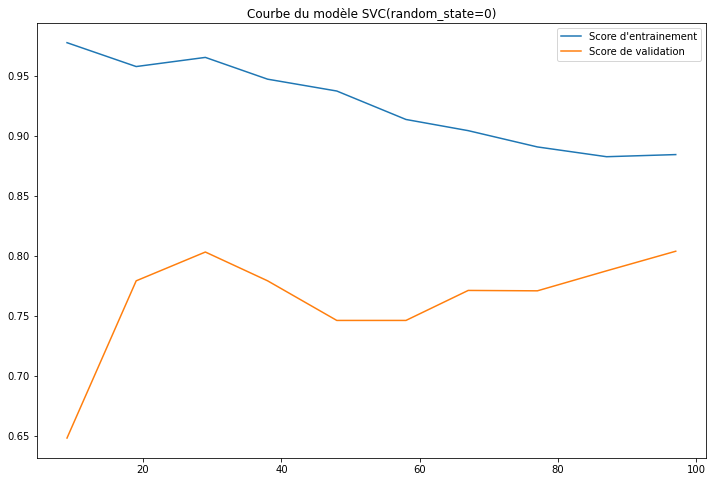

In [61]:
#visualisation finale
model  = model5
N, train_score, val_score = learning_curve(model, X_test, y_test,cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1., 10))

plt.figure(figsize=(12, 8))
plt.title(f"Courbe du modèle {model}")
plt.plot(N, train_score.mean(axis=1), label = "Score d'entrainement")
plt.plot(N, val_score.mean(axis=1), label = 'Score de validation')
plt.legend();